In [1]:
print("Hello, Jupyter! I'm ready to analyze Uber data.")


Hello, Jupyter! I'm ready to analyze Uber data.


In [2]:
!python --version

Python 3.10.13


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries loaded successfully!")


Matplotlib is building the font cache; this may take a moment.


Libraries loaded successfully!


In [4]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('Uber-Jan-Feb-FOIL.csv')

# Show first 5 rows
data.head()


,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [5]:
# Show data info (columns, data types, etc.)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


In [8]:
import pandas as pd

# Load the CSV (already done, but just in case)
data = pd.read_csv('Uber-Jan-Feb-FOIL.csv')

# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract features: Day of Week and Month
data['day_of_week'] = data['date'].dt.dayofweek   # 0=Monday
data['month'] = data['date'].dt.month             # 1=January, 2=February

# Preview updated data
data.head()


,dispatching_base_number,date,active_vehicles,trips,day_of_week,month
0,B02512,2015-01-01,190,1132,3,1
1,B02765,2015-01-01,225,1765,3,1
2,B02764,2015-01-01,3427,29421,3,1
3,B02682,2015-01-01,945,7679,3,1
4,B02617,2015-01-01,1228,9537,3,1


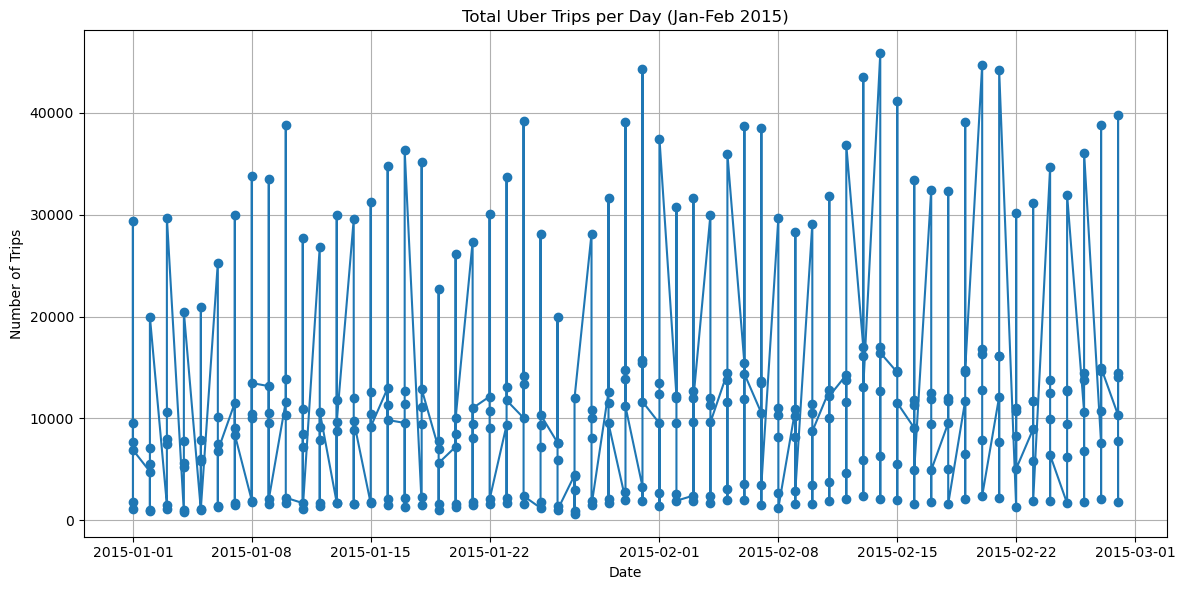

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(data['date'], data['trips'], marker='o', linestyle='-')
plt.title('Total Uber Trips per Day (Jan-Feb 2015)')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_141/3855654336.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='day_of_week', y='trips', data=data, ci=None)


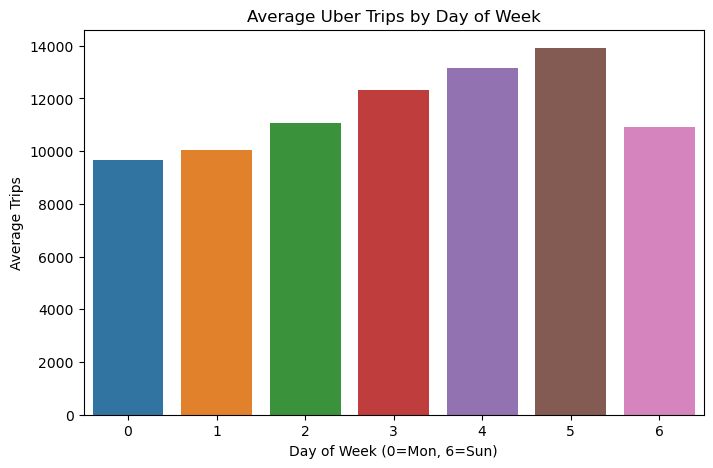

In [10]:
import seaborn as sns

# Calculate average trips per day of week
plt.figure(figsize=(8,5))
sns.barplot(x='day_of_week', y='trips', data=data, ci=None)
plt.title('Average Uber Trips by Day of Week')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Average Trips')
plt.show()


/tmp/ipykernel_141/1201202725.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='month', y='trips', data=data, ci=None)


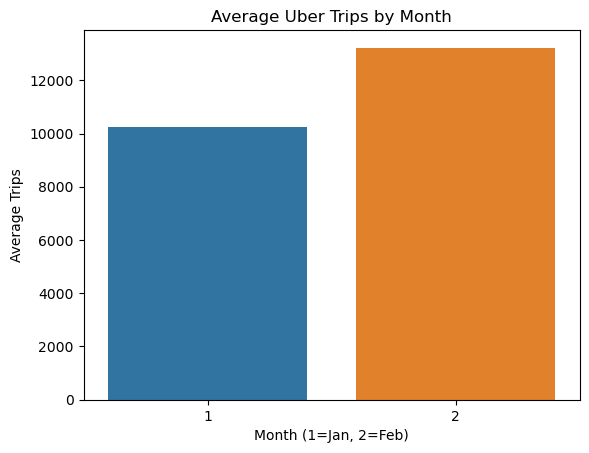

In [11]:
sns.barplot(x='month', y='trips', data=data, ci=None)
plt.title('Average Uber Trips by Month')
plt.xlabel('Month (1=Jan, 2=Feb)')
plt.ylabel('Average Trips')
plt.show()


In [12]:
# Create lag features for trips
data['trips_lag1'] = data['trips'].shift(1)  # trips 1 day before
data['trips_lag2'] = data['trips'].shift(2)  # trips 2 days before

# Remove rows with missing values caused by shifting
data = data.dropna()

# View updated data
data.head()


,dispatching_base_number,date,active_vehicles,trips,day_of_week,month,trips_lag1,trips_lag2
2,B02764,2015-01-01,3427,29421,3,1,1765.0,1132.0
3,B02682,2015-01-01,945,7679,3,1,29421.0,1765.0
4,B02617,2015-01-01,1228,9537,3,1,7679.0,29421.0
5,B02598,2015-01-01,870,6903,3,1,9537.0,7679.0
6,B02598,2015-01-02,785,4768,4,1,6903.0,9537.0


In [13]:
from sklearn.model_selection import train_test_split

# Select features and target
X = data[['active_vehicles', 'day_of_week', 'month', 'trips_lag1', 'trips_lag2']]
y = data['trips']

# Split data into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


In [15]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 1226.65
R² Score: 0.96


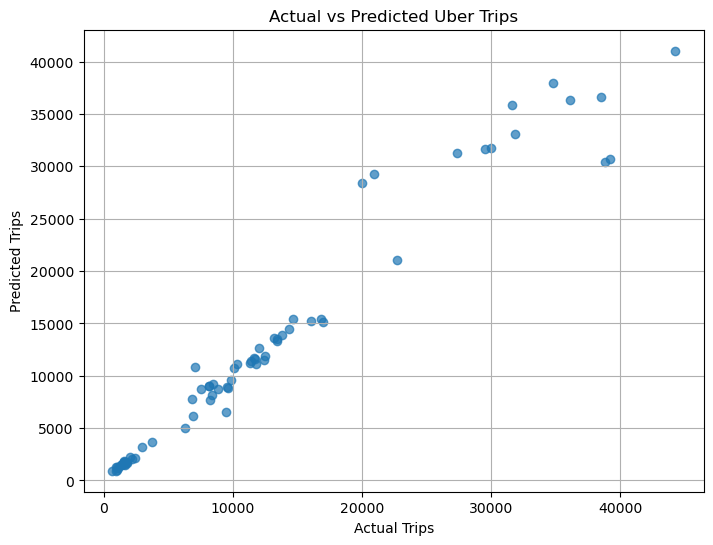

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Trips")
plt.ylabel("Predicted Trips")
plt.title("Actual vs Predicted Uber Trips")
plt.grid(True)
plt.show()


In [17]:
!pwd


/home/39e058f7-0f81-459b-b51a-35481f5cf5aa
